Feature Names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target Classes: ['class_0' 'class_1' 'class_2']

Evaluating different values of K:
K = 1 --> Accuracy = 0.9444
K = 2 --> Accuracy = 0.9444
K = 3 --> Accuracy = 0.9444
K = 4 --> Accuracy = 0.9444
K = 5 --> Accuracy = 0.9444
K = 6 --> Accuracy = 0.9444
K = 7 --> Accuracy = 0.9444
K = 8 --> Accuracy = 0.9444
K = 9 --> Accuracy = 0.9444
K = 10 --> Accuracy = 0.9444

Final Model Evaluation with K = 3
Accuracy: 0.9444444444444444

Classification Report:
              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        

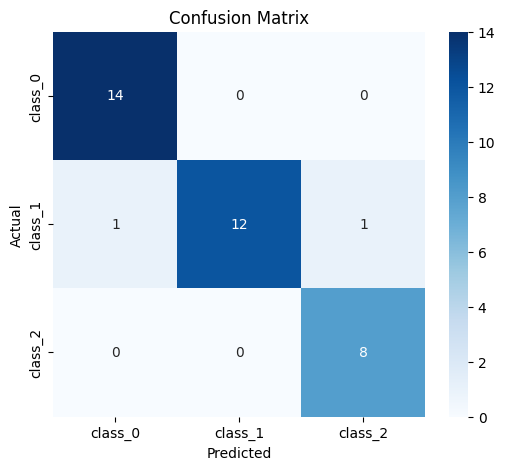

In [2]:
# Task 6 – KNN Classification using Wine Dataset

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

# Explore basic structure
print("Feature Names:", feature_names)
print("Target Classes:", target_names)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Try different values of K and evaluate accuracy
print("\nEvaluating different values of K:")
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} --> Accuracy = {acc:.4f}")

# Final model with best K (example: 3)
best_k = 3
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_pred_final = knn_final.predict(X_test)

# Evaluation
print(f"\nFinal Model Evaluation with K = {best_k}")
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
